In [221]:
# -*- coding:utf-8 -*-
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import *
%matplotlib inline

In [222]:
## 데이터 불러오기###########################################
KOSPI200_index=pd.read_csv('KOSPI200_index.csv').set_index('Date')
KOSPI200_close=pd.read_csv('KOSPI200_close.csv').set_index('Date')

df_port_info=pd.read_csv('codenamelist.csv',encoding='cp949',dtype=str)
df_pf=pd.DataFrame()
del df_port_info['Unnamed: 0']
###########################################################
KOSPI200_close.head()

,005930,000660,005380,068270,051910,012330,207940,005490,051900,055550,...,060980,034120,014830,003920,096760,002960,079430,033920,003300,036580
Date,,,,,,,,,,,,,,,,,,,,,
2018.05.10,50600,84500,150500,264000,337500,229000,380500,350000,1281000,46950,...,50900,25450,53300,668000,8200,332500,23000,16650,167500,12350
2018.05.11,51200,85400,151500,256000,341500,232000,382000,357500,1295000,47500,...,51000,25500,54900,679000,8290,332000,23500,16750,163500,12450
2018.05.14,49900,84500,150500,254500,347000,236000,362500,360000,1290000,47600,...,51100,25800,55200,681000,8140,333500,23350,16800,167500,13000
2018.05.15,49100,83900,148000,262000,346500,237500,367000,366000,1267000,48400,...,51500,25950,55200,677000,8210,332000,23550,16700,173500,12650
2018.05.16,49150,84800,146000,267000,340000,234500,388000,359000,1269000,47900,...,50300,25750,56100,674000,8060,333000,22950,16300,161500,12350


In [223]:
# 평균, 표준편차 구하기(%단위, 복습) => 일별 수익률로 정렬
temp_df=KOSPI200_close.copy()
temp_diff=temp_df/temp_df.shift(1)
df_port_info['avgdaily']=[(x-1)*100 for x in temp_diff.iloc[1:120].mean().tolist()]
df_port_info['stddaily']=[x*100 for x in temp_diff.iloc[1:120].std().tolist()]

df_sort=df_port_info.sort_values(by=['avgdaily'],ascending=False).dropna()
df_sort

,Code,Name,avgdaily,stddaily
103,020150,일진머티리얼즈,0.323735,3.170059
26,036570,엔씨소프트,0.218261,2.077252
20,006400,삼성SDI,0.200067,2.594051
39,032640,LG유플러스,0.193328,2.198572
107,111770,영원무역,0.145464,2.360354
80,042660,대우조선해양,0.141666,2.579395
83,030000,제일기획,0.140435,1.903811
10,017670,SK텔레콤,0.138807,1.490904
54,005830,DB손해보험,0.129892,1.829382
142,020000,한섬,0.120592,2.511223


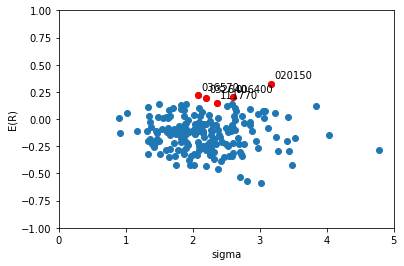

In [224]:
# 시각화, daily avg return 상위 5개 표시
plt.scatter(df_port_info.iloc[:,3],df_port_info.iloc[:,2])
plt.axis([0,5,-1,1])
plt.xlabel('sigma')
plt.ylabel('E(R)')

# 빠른 실습을 위해 5개의 주식으로만 계산 진행
Top_n=5
for i in range(Top_n):
    plt.scatter(df_sort.iloc[i,3],df_sort.iloc[i,2],color='r')
    plt.text(df_sort.iloc[i,3]+0.05,df_sort.iloc[i,2]+0.05,str(df_sort.iloc[i,0]))

In [225]:
# Cov Array 구성
port_list=df_sort['Code'].iloc[:Top_n].tolist()
covMat=temp_diff.iloc[1:120].cov().loc[port_list,port_list]*10000
covMat

,020150,036570,006400,032640,111770
020150,10.049276,1.859685,4.041104,0.956377,1.244704
036570,1.859685,4.314977,1.190850,1.046530,0.841299
006400,4.041104,1.190850,6.729103,0.117090,0.462209
032640,0.956377,1.046530,0.117090,4.833717,0.375315
111770,1.244704,0.841299,0.462209,0.375315,5.571273


In [226]:
int(Top_n*(Top_n-1)/2)


10

In [227]:
# 난수발생을 이용한 여러가지 포트폴리오 구하기
n_2comb=int(Top_n*(Top_n-1)/2)
n_iter=int(n_2comb*30+500)
result_list=np.zeros((n_iter,2))
port_list=np.zeros((n_2comb,2),dtype=int)
c=0
for i in range(Top_n):
    for j in range(i+1,Top_n):
        port_list[c,0]=i
        port_list[c,1]=j
        c+=1

c=0
wMat=np.zeros((n_iter,Top_n))

for k in range(n_2comb):
    aa=np.random.uniform(0,1,[30,2])
    bb=np.sum(aa,axis=1)
    cc=np.zeros((30,2))
    for i in range(30):
        cc[i,:]=aa[i,:]/bb[i]
        result_list[c,0]=np.sqrt(np.sum(np.array(covMat.iloc[port_list[k],port_list[k]])
                                        *np.array(cc[i,:])*(np.array(cc[i,:]).reshape(-1,1))))
        result_list[c,1]=np.sum(np.array(df_sort['avgdaily'].iloc[port_list[k]])*cc[i,:])
        wMat[c,port_list[k,0]]=cc[i,0]
        wMat[c,port_list[k,1]]=cc[i,1]
        c+=1


aa=np.random.uniform(0,1,[n_iter,Top_n])
bb=np.sum(aa,axis=1)
for i in range(500):
    wMat[c,:]=aa[i,:]/bb[i]
    result_list[c,0]=np.sqrt(np.sum(np.array(covMat.iloc[:Top_n,:Top_n])*np.array(wMat[i,:])
                                 *(np.array(wMat[i,:]).reshape(-1,1))))
    result_list[c,1]=np.sum(np.array(df_sort['avgdaily'].iloc[:Top_n])*wMat[i,:])
    c+=1
result_list

array([[2.72580975, 0.30461639],
       [1.95908631, 0.23292515],
       [1.99212357, 0.25774907],
       ...,
       [1.55078104, 0.21597494],
       [1.44330664, 0.20121398],
       [1.85527059, 0.25183937]])

# CAPM 

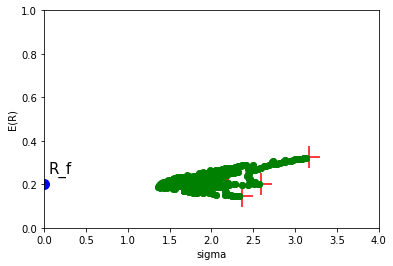

In [228]:
# 무위험자산 daily 수익 0.2라 가정하고 수익률-표준편차 축으로 시각화
r_f=0.2

plt.scatter(df_sort['stddaily'].iloc[:Top_n],df_sort['avgdaily'].iloc[:Top_n],color='r',marker='+',s=500)
plt.xlabel('sigma')
plt.ylabel('E(R)')
plt.axis([0,4,0,1])
plt.scatter(0,r_f,color='b',s=100)
plt.text(0.05,r_f+0.05,'R_f',size=15)
plt.scatter(result_list[:,0],result_list[:,1],color='g')

# 시장포트폴리오 구하기

In [229]:
# 시장포트폴리오 M 구하기 => 무위험 이자율과 포트폴리오를 연결한 선의 기울기가 가장 큰 포트폴리오
# 난수발생한 결과를 통해 구성되므로 매번 달라질 수 있지만, 비슷한 위치의 지점
ratio_list=(result_list[:,1]-r_f)/result_list[:,0]
M=np.argmax(ratio_list)
M

323

Text(6.25223,0.443867,'CML')

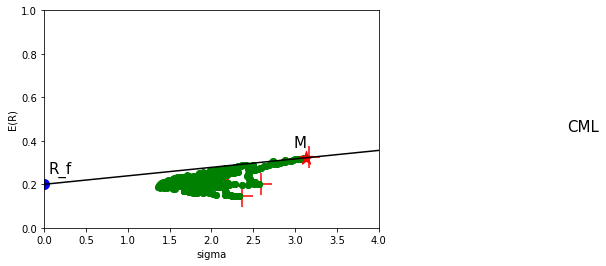

In [230]:
# 시각화
plt.scatter(df_sort['stddaily'].iloc[:Top_n],df_sort['avgdaily'].iloc[:Top_n],color='r',marker='+',s=500)
plt.xlabel('sigma')
plt.ylabel('E(R)')
plt.axis([0,4,0,1])
plt.scatter(0,r_f,color='b',s=100)
plt.text(0.05,r_f+0.05,'R_f',size=15)

plt.scatter(result_list[:,0],result_list[:,1],color='g')
plt.scatter(result_list[M,0],result_list[M,1],color='r',marker='*',s=200)
plt.text(result_list[M,0]-0.15,result_list[M,1]+0.05,'M',size=15)

plt.plot([0,(result_list[M,0]*2)],[r_f,ratio_list[M]*(result_list[M,0]*2)+r_f],color='k')
plt.text(result_list[M,0]*2,ratio_list[M]*(result_list[M,0]*2)+r_f,'CML',size=15)

# 시장포트폴리오로 자산 리밸런싱 백테스트

In [231]:
## Logic1 : 1/N 균등분배###########################################
KOSPI200_index=pd.read_csv('KOSPI200_index.csv').set_index('Date')
KOSPI200_close=pd.read_csv('KOSPI200_close.csv').set_index('Date')
df_port_info=pd.read_csv('codenamelist.csv',encoding='cp949',dtype=str)
df_pf=pd.DataFrame()
del df_port_info['Unnamed: 0']

## GLOBAL VARIABLE#########################################
target_n=240                  # 약 1년치 데이터(한달:20일로 가정)
initial_balance=100000000     # 초기 잔고 1억
balance=initial_balance
rperiod=20                    # rebalancing period
nperiod=int(120/rperiod)      # rebalncing 횟수
residual=0                    # 잔여 현금
balanceMat=np.zeros(target_n) # 포트폴리오의 가치 시계열
RESULT=np.zeros((len(balanceMat),4))
###########################################################

for i in range(nperiod):
    ##### 종목 선정 로직 적용 #################################################
    cur=120+rperiod*i
    st=np.array(KOSPI200_close.iloc[cur-120],dtype=int)
    en=np.array(KOSPI200_close.iloc[cur-1],dtype=int)
    rt=pd.DataFrame([x/y for x,y in zip(en,st)]).replace([np.inf, -np.inf],1)
    df_port_info['return_period'+str(i)]=rt
    df_sort=df_port_info.sort_values(by=['return_period'+str(i)],ascending=False)
    ########################################################################
    
    ##### 자산 배분 #########################################################
    top_N=5
    port_list=list(df_sort.iloc[:top_N,0])

    pfMat=np.zeros(top_N)    
    for j,jj in enumerate(port_list):
        pfMat[j]=floor((balance/top_N)/int(KOSPI200_close[jj][cur]))
        balanceMat[cur:cur+rperiod]+=np.array(KOSPI200_close[jj][cur:cur+rperiod],dtype=int)*pfMat[j]
    ########################################################################
    
    ###### 메도/매수 이행#####################################################
    residual=balance-balanceMat[cur]
    balanceMat[cur:cur+rperiod]+=residual
    balance=balanceMat[cur+rperiod-1]+residual
    ########################################################################
    
    ##### 결과 저장 #########################################################
    df_pf['Code_period'+str(i)]=list(df_sort['Code'].iloc[:top_N])
    df_pf['Name_period'+str(i)]=list(df_sort['Name'].iloc[:top_N])
    df_pf['return_period'+str(i)]=list(df_sort['return_period'+str(i)].iloc[:top_N])
    df_pf['volume_period'+str(i)]=pfMat
    ################################################################

#benchmark result
RESULT[:,0]=balanceMat/initial_balance
RESULT[120:,0]

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in long_scalars


array([1.       , 1.0128105, 0.992854 , 0.98096  , 0.9789395, 0.998609 ,
       1.000885 , 1.016262 , 1.024586 , 1.011156 , 1.0124515, 1.0135425,
       0.9937675, 0.9911035, 0.9970645, 0.9986875, 1.02186  , 1.0271665,
       1.0254965, 1.020438 , 1.029168 , 1.016811 , 1.024108 , 1.016828 ,
       1.034554 , 1.030076 , 1.05221  , 1.046127 , 1.046818 , 1.027465 ,
       1.016331 , 1.012617 , 1.006369 , 1.021176 , 0.993684 , 0.990838 ,
       0.998657 , 1.006361 , 0.997034 , 0.997004 , 1.001795 , 1.005364 ,
       1.013122 , 1.00294  , 0.978782 , 0.9876775, 1.0002045, 1.0025685,
       0.9859975, 0.9871495, 0.994057 , 0.9914055, 0.998737 , 0.9942475,
       0.98976  , 0.9933045, 0.9806405, 0.96222  , 0.954782 , 0.94815  ,
       0.9498835, 0.9538375, 0.9637507, 0.9602617, 0.9531275, 0.9466528,
       0.9545699, 0.9656712, 0.9740825, 0.9645016, 0.9755988, 0.9901042,
       1.0006672, 0.9889117, 0.9833535, 0.9941718, 1.0128685, 1.0059594,
       0.9979296, 0.979017 , 0.979692 , 0.9698295, 

In [232]:
df_pf

,Code_period0,Name_period0,return_period0,volume_period0,Code_period1,Name_period1,return_period1,volume_period1,Code_period2,Name_period2,...,return_period3,volume_period3,Code_period4,Name_period4,return_period4,volume_period4,Code_period5,Name_period5,return_period5,volume_period5
0,020150,일진머티리얼즈,1.385991,434.0,036570,엔씨소프트,1.345833,41.0,012450,한화에어로스페이스,...,1.461864,532.0,004800,효성,1.717514,260.0,004800,효성,1.615880,264.0
1,036570,엔씨소프트,1.263689,45.0,032640,LG유플러스,1.323194,1196.0,017800,현대엘리베이,...,1.456376,283.0,034120,SBS,1.382271,774.0,025540,한국단자,1.519802,331.0
2,032640,LG유플러스,1.223108,1315.0,042660,대우조선해양,1.267045,614.0,105630,한세실업,...,1.373602,619.0,052690,한전기술,1.375610,713.0,064960,S&amp;T;모티브,1.434307,503.0
3,006400,삼성SDI,1.219577,87.0,111770,영원무역,1.236928,540.0,032640,LG유플러스,...,1.348228,2248.0,012450,한화에어로스페이스,1.328000,607.0,009240,한샘,1.388060,213.0
4,017670,SK텔레콤,1.164045,75.0,017670,SK텔레콤,1.203905,74.0,009540,현대중공업,...,1.305447,568.0,105630,한세실업,1.309524,807.0,105630,한세실업,1.346988,722.0


In [233]:
def find_mvp(cMat,df_s,nn,t):
    result_list=np.zeros((300,2))
    result_weight=np.zeros((300,nn))
    c=0

    aa=np.random.uniform(0,1,[300,nn])
    bb=np.sum(aa,axis=1)
    cc=np.zeros((300,nn))

    for i in range(300):
        cc[i,:]=aa[i,:]/bb[i]
        result_list[c,0]=np.sqrt(np.sum(np.array(cMat.iloc[:nn,:nn])*np.array(cc[i,:])
                                     *(np.array(cc[i,:]).reshape(-1,1))))
        result_list[c,1]=np.sum(np.array(df_s['return_period'+str(t)].iloc[:nn])*cc[i,:])
        result_weight[c,:]=cc[i,:]
        c+=1

    ## Find MVP ###############################################
    index_mvp = np.argmin(result_list[:,0])
    return result_weight[index_mvp]

In [234]:
########### logic2 : MVP ########################
df_port_info=pd.read_csv('codenamelist.csv',encoding='cp949',dtype=str)
df_pf2=pd.DataFrame()
del df_port_info['Unnamed: 0']

## GLOBAL VARIABLE#########################################
target_n=240                  # 약 1년치 데이터(한달:20일로 가정)
initial_balance=100000000     # 초기 잔고 1억
balance=initial_balance
rperiod=20                    # rebalancing period
nperiod=int(120/rperiod)      # rebalncing 횟수
residual=0                    # 잔여 현금
balanceMat=np.zeros(target_n) # 포트폴리오의 가치 시계열
###########################################################
for i in range(nperiod):
    ##### 종목 선정 로직 적용 #################################################
    cur=120+rperiod*i
    
    st=np.array(KOSPI200_close.iloc[cur-120],dtype=int)
    en=np.array(KOSPI200_close.iloc[cur-1],dtype=int)
    rt=pd.DataFrame([x/y for x,y in zip(en,st)]).replace([np.inf, -np.inf],1)
    
    df_port_info['return_period'+str(i)]=rt
    df_sort=df_port_info.sort_values(by=['return_period'+str(i)],ascending=False)
    
    top_N=5
    port_list=list(df_sort.iloc[:top_N,0])
    idx=find_mvp(covMat,df_sort,top_N,i)
    ################################################################
    
    ##### 자산 배분 #################################################
    pfMat=np.zeros(top_N)    
    for j,jj in enumerate(port_list):
        pfMat[j]=floor((balance*idx[j])/int(KOSPI200_close[jj][cur]))
        balanceMat[cur:cur+rperiod]+=np.array(KOSPI200_close[jj][cur:cur+rperiod],dtype=int)*pfMat[j]
    
    residual=balance-balanceMat[cur]
    balanceMat[cur:cur+rperiod]+=residual
    balance=balanceMat[cur+rperiod-1]+residual
    
    df_pf2['Code_period'+str(i)]=list(df_sort['Code'].iloc[:top_N])
    df_pf2['Name_period'+str(i)]=list(df_sort['Name'].iloc[:top_N])
    df_pf2['return_period'+str(i)]=list(df_sort['return_period'+str(i)].iloc[:top_N])
    df_pf2['volume_period'+str(i)]=pfMat
    ################################################################

RESULT[:,1]=balanceMat/initial_balance
df_pf2

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: divide by zero encountered in long_scalars


,Code_period0,Name_period0,return_period0,volume_period0,Code_period1,Name_period1,return_period1,volume_period1,Code_period2,Name_period2,...,return_period3,volume_period3,Code_period4,Name_period4,return_period4,volume_period4,Code_period5,Name_period5,return_period5,volume_period5
0,020150,일진머티리얼즈,1.385991,178.0,036570,엔씨소프트,1.345833,3.0,012450,한화에어로스페이스,...,1.461864,51.0,004800,효성,1.717514,23.0,004800,효성,1.615880,7.0
1,036570,엔씨소프트,1.263689,45.0,032640,LG유플러스,1.323194,1408.0,017800,현대엘리베이,...,1.456376,367.0,034120,SBS,1.382271,986.0,025540,한국단자,1.519802,546.0
2,032640,LG유플러스,1.223108,1070.0,042660,대우조선해양,1.267045,520.0,105630,한세실업,...,1.373602,583.0,052690,한전기술,1.375610,730.0,064960,S&amp;T;모티브,1.434307,508.0
3,006400,삼성SDI,1.219577,142.0,111770,영원무역,1.236928,867.0,032640,LG유플러스,...,1.348228,2664.0,012450,한화에어로스페이스,1.328000,938.0,009240,한샘,1.388060,247.0
4,017670,SK텔레콤,1.164045,87.0,017670,SK텔레콤,1.203905,98.0,009540,현대중공업,...,1.305447,871.0,105630,한세실업,1.309524,909.0,105630,한세실업,1.346988,904.0


In [235]:
def find_M(cMat,df_s,nn,r_f,t):
    n_2comb=int(nn*(nn-1)/2)
    n_iter=int(n_2comb*30+500)
    result_list=np.zeros((n_iter,2))
    port_list=np.zeros((n_2comb,2),dtype=int)
    c=0
    for i in range(nn):
        for j in range(i+1,nn):
            port_list[c,0]=i
            port_list[c,1]=j
            c+=1

    c=0
    wMat=np.zeros((n_iter,nn))

    for k in range(n_2comb):
        aa=np.random.uniform(0,1,[30,2])
        bb=np.sum(aa,axis=1)
        cc=np.zeros((30,2))
        for i in range(30):
            cc[i,:]=aa[i,:]/bb[i]
            result_list[c,0]=np.sqrt(np.sum(np.array(cMat.iloc[port_list[k],port_list[k]])
                                            *np.array(cc[i,:])*(np.array(cc[i,:]).reshape(-1,1))))
            result_list[c,1]=np.sum(np.array(df_s['return_period'+str(t)].iloc[port_list[k]])*cc[i,:])
            wMat[c,port_list[k,0]]=cc[i,0]
            wMat[c,port_list[k,1]]=cc[i,1]
            c+=1


    aa=np.random.uniform(0,1,[n_iter,nn])
    bb=np.sum(aa,axis=1)
    for i in range(500):
        wMat[c,:]=aa[i,:]/bb[i]
        result_list[c,0]=np.sqrt(np.sum(np.array(cMat.iloc[:nn,:nn])*np.array(wMat[i,:])
                                     *(np.array(wMat[i,:]).reshape(-1,1))))
        result_list[c,1]=np.sum(np.array(df_s['return_period'+str(t)].iloc[:nn])*wMat[i,:])
        c+=1

    ratio_list=(result_list[:,1]-r_f)/result_list[:,0]
    M=np.argmax(ratio_list)
    return wMat,M

In [236]:
########### logic3 : 시장포트폴리오 비율로 투자 ########################
df_port_info=pd.read_csv('codenamelist.csv',encoding='cp949',dtype=str)
df_pf3=pd.DataFrame()
del df_port_info['Unnamed: 0']

## GLOBAL VARIABLE#########################################
target_n=240                  # 약 1년치 데이터(한달:20일로 가정)
initial_balance=100000000     # 초기 잔고 1억
balance=initial_balance
rperiod=20                    # rebalancing period
nperiod=int(120/rperiod)      # rebalncing 횟수
residual=0                    # 잔여 현금
balanceMat=np.zeros(target_n) # 포트폴리오의 가치 시계열
top_N=5
###########################################################
for i in range(nperiod):
    ##### 종목 선정 #################################################
    cur=120+rperiod*i
    
    st=np.array(KOSPI200_close.iloc[cur-120],dtype=int)
    en=np.array(KOSPI200_close.iloc[cur-1],dtype=int)
    rt=pd.DataFrame([x/y for x,y in zip(en,st)]).replace([np.inf, -np.inf],1)
    
    df_port_info['return_period'+str(i)]=rt
    df_sort=df_port_info.sort_values(by=['return_period'+str(i)],ascending=False)
    
    top_N=5
    port_list=list(df_sort.iloc[:top_N,0])

    temp_df=KOSPI200_close.copy()
    temp_diff=temp_df/temp_df.shift(1)
    covMat=temp_diff.iloc[cur-119:cur].cov().loc[port_list,port_list]*10000
    
    weightMat,idxM=find_M(covMat,df_sort,top_N,0.2,i)
    print('Period',i, '리밸런싱 비율')
    print(weightMat[idxM])
    ################################################################
    
    ##### 자산 배분 #################################################
    pfMat=np.zeros(top_N)    
    for j,jj in enumerate(port_list):
        pfMat[j]=floor((balance*weightMat[idxM,j])/int(KOSPI200_close[jj][cur]))
        balanceMat[cur:cur+rperiod]+=np.array(KOSPI200_close[jj][cur:cur+rperiod],dtype=int)*pfMat[j]

    residual=balance-balanceMat[cur]
    balanceMat[cur:cur+rperiod]+=residual
    balance=balanceMat[cur+rperiod-1]+residual
    
    df_pf3['Code_period'+str(i)]=list(df_sort['Code'].iloc[:top_N])
    df_pf3['Name_period'+str(i)]=list(df_sort['Name'].iloc[:top_N])
    df_pf3['return_period'+str(i)]=list(df_sort['return_period'+str(i)].iloc[:top_N])
    df_pf3['volume_period'+str(i)]=pfMat
    ################################################################

RESULT[:,2]=balanceMat/initial_balance
df_pf3

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: divide by zero encountered in long_scalars


Period 0 리밸런싱 비율
[0.34112505 0.09116728 0.07182297 0.15996809 0.33591662]
Period 1 리밸런싱 비율
[0.35552827 0.02753537 0.14734644 0.13154419 0.33804572]
Period 2 리밸런싱 비율
[0.26437769 0.14338758 0.11585596 0.06544124 0.41093752]
Period 3 리밸런싱 비율
[0.28311183 0.32420047 0.02867478 0.1385263  0.22548661]
Period 4 리밸런싱 비율
[0.17411143 0.26673524 0.23571758 0.17963522 0.14380053]
Period 5 리밸런싱 비율
[0.1921725  0.34079847 0.25555277 0.00530461 0.20617165]


,Code_period0,Name_period0,return_period0,volume_period0,Code_period1,Name_period1,return_period1,volume_period1,Code_period2,Name_period2,...,return_period3,volume_period3,Code_period4,Name_period4,return_period4,volume_period4,Code_period5,Name_period5,return_period5,volume_period5
0,020150,일진머티리얼즈,1.385991,741.0,036570,엔씨소프트,1.345833,71.0,012450,한화에어로스페이스,...,1.461864,704.0,004800,효성,1.717514,211.0,004800,효성,1.615880,233.0
1,036570,엔씨소프트,1.263689,20.0,032640,LG유플러스,1.323194,157.0,017800,현대엘리베이,...,1.456376,429.0,034120,SBS,1.382271,962.0,025540,한국단자,1.519802,519.0
2,032640,LG유플러스,1.223108,472.0,042660,대우조선해양,1.267045,432.0,105630,한세실업,...,1.373602,83.0,052690,한전기술,1.375610,783.0,064960,S&amp;T;모티브,1.434307,591.0
3,006400,삼성SDI,1.219577,70.0,111770,영원무역,1.236928,339.0,032640,LG유플러스,...,1.348228,1457.0,012450,한화에어로스페이스,1.328000,508.0,009240,한샘,1.388060,5.0
4,017670,SK텔레콤,1.164045,127.0,017670,SK텔레콤,1.203905,119.0,009540,현대중공업,...,1.305447,600.0,105630,한세실업,1.309524,541.0,105630,한세실업,1.346988,684.0


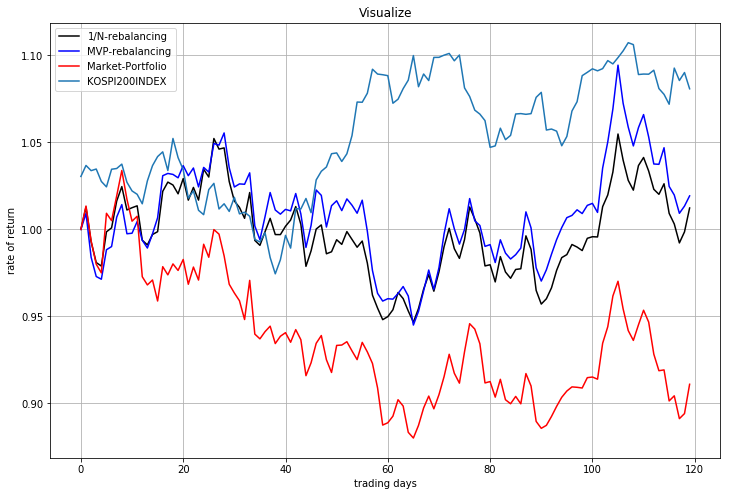

In [237]:
plt.figure(figsize=(12,8))
plt.plot(RESULT[120:,0],color='k')
plt.plot(RESULT[120:,1],color='b')
plt.plot(RESULT[120:,2],color='r')

# 3번 index에는 KOSPI200 인덱스 수익률
RESULT[120:,3]=list(KOSPI200_index['Close'])[126:]/KOSPI200_index['Close'][120]
plt.plot(RESULT[120:,3])

plt.grid(20)
plt.title('Visualize')
plt.ylabel('rate of return')
plt.xlabel('trading days')
plt.legend(['1/N-rebalancing','MVP-rebalancing','Market-Portfolio','KOSPI200INDEX'])

# 성과지표 구하기(6개월기준)
 * 1) 기대수익률
 * 2) 표준편차(변동성)
 * 3) MDD
 * 4) Sharpe ratio(무위험 이자율 0으로 가정)

In [238]:
df_RESULT=pd.DataFrame([[0,0,0,0,0] for i in range(4)],columns=['Return','Return(daily)','STD(daily)',
                                                                'Sharpe ratio','MDD'])
MDD_info=np.zeros((4,2),dtype=int) # MDD 시작과, 끝을 기록

temp_diff=RESULT[121:,:]/RESULT[120:-1,:]
for i in range(4):
    df_RESULT.iloc[i,0]=(RESULT[-1,i]-RESULT[120,i])/RESULT[120,i]*100
    df_RESULT.iloc[i,1]=np.mean(temp_diff[:,i]-1)*100
    df_RESULT.iloc[i,2]=np.std(temp_diff[:,i])*100
    df_RESULT.iloc[i,3]=(df_RESULT.iloc[i,1]/df_RESULT.iloc[i,2])*np.sqrt(target_n)    #Q. 왜 이항목을 곱할까요 :STD에서 제곱근이 계산 되지 않았기 때문인가요?.. 잘 모르겠습니다.
    
    MDD_temp=[]
    MDD_temp_idx=[]
    for j in range(120,120+np.size(RESULT[120:,i],0)):
        MDD_temp.append((np.min(RESULT[j:,i])-RESULT[j,i])/RESULT[j,i])
        MDD_temp_idx.append(np.argmin(RESULT[j:,i]))
    
    df_RESULT.iloc[i,4]=np.abs(np.min(MDD_temp))*100
    MDD_info[i,0]=int(np.argmin(MDD_temp))
    MDD_info[i,1]=MDD_info[i,0]+MDD_temp_idx[MDD_info[i,0]]

    
df_RESULT.index=[['benchmark','MVP','market','KOSPI200']]
df_RESULT

,Return,Return(daily),STD(daily),Sharpe ratio,MDD
benchmark,1.229950,0.016127,1.081584,0.230999,10.031952
MVP,1.925350,0.022782,1.161682,0.303813,10.455986
market,-8.896850,-0.070636,1.235021,-0.886045,14.865448
KOSPI200,4.888149,0.043679,0.844889,0.800905,7.390108


In [239]:
#########      #############
for i in range(4):
    df_RESULT.iloc[i,0]=(RESULT[-1,i]-RESULT[120,i])/RESULT[120,i]*100
    df_RESULT.iloc[i,1]=np.mean(temp_diff[:,i]-1)*100
    df_RESULT.iloc[i,2]=np.std(temp_diff[:,i])*100
    df_RESULT.iloc[i,3]=(df_RESULT.iloc[i,1]/df_RESULT.iloc[i,2])*np.sqrt(target_n)    #Q. 왜 이항목을 곱할까요 
    print(df_RESULT.iloc[i,1],'/',df_RESULT.iloc[i,2],'*',np.sqrt(target_n),'=',df_RESULT.iloc[i,3])

0.01612744169242722 / 1.0815844166706128 * 15.491933384829668 = 0.23099930852914216
0.022781802705822644 / 1.1616820288820005 * 15.491933384829668 = 0.30381305824675586
-0.07063572672419104 / 1.235020524230213 * 15.491933384829668 = -0.886045172149885
0.0436792171728393 / 0.8448888903869565 * 15.491933384829668 = 0.8009047466977809


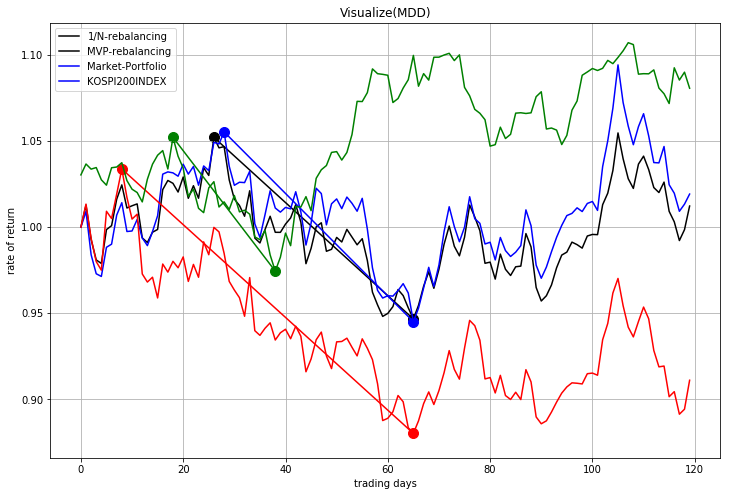

In [240]:
######## MDD visualizing########

color=['k','b','r','g'] 

plt.figure(figsize=(12,8))
plt.grid(20)
plt.title('Visualize(MDD)')
plt.ylabel('rate of return')
plt.xlabel('trading days')

for i in range(4):
    plt.plot(RESULT[120:,i],c=color[i])
  
    plt.scatter(MDD_info[i,0],RESULT[120+MDD_info[i,0],i],c=color[i],s=100)
    plt.scatter(MDD_info[i,1],RESULT[120+MDD_info[i,1],i],c=color[i],s=100)
    plt.plot([MDD_info[i,0],MDD_info[i,1]],[RESULT[120+MDD_info[i,0],i],RESULT[120+MDD_info[i,1],i]],c=color[i])

plt.legend(['1/N-rebalancing','MVP-rebalancing','Market-Portfolio','KOSPI200INDEX'])

# 한가지 전략을 정하여 KOSPI200을 벤치마크로 TR, IR을 구해보기

In [120]:

input_returns = RESULT[120::20,1] #MVP
input_benchmark = RESULT[120::20,0] #Benchmark
######################### 월별
# input_returns = RESULT[120::20,2] 
# input_benchmark = RESULT[120::20,0] 
#########################

def Tracking_record(returns, benchmark):
    diff = (returns - benchmark)
    return np.std(diff)*100

TR=Tracking_record(input_returns,input_benchmark)
print(TR)

def information_ratio(returns, benchmark):
    diff = (returns - benchmark)*100
    return np.mean(diff) / np.std(diff) 

IR=information_ratio(input_returns,input_benchmark)
print(IR)

2.9435683210273145
1.5340168261348237


네 맞습니다. daily 로 하신 것 같고 전략에 따라 월,년별로 환산해서 생각할수도있습니다.
중요한것은, 비교하고자 하는 전략이 두 개가 있다면 두 전략의의 지표들을 기간별 scale을 맞춰주시는것만 잘 기억하시면 됩니다.!